#**Data Science And Business Analytics Internship** 
## **The Sparks Foundation Task 1** 
> **Prediction using Supervised Machine Learning**

>Simple Linear regression 

## Author: Aditya Phulallwar

### **Problem Definition :**
  >Predict the percentage of an student based on the no. of the study hours. What will be predicted score if a student studies for 9.25 hrs/ day ?

###**Data :**

>Dataset is available at : http://bit.ly/w-data 

### **Evaluation**
>For this problem,R^2, mean absolute error and mean squared error will be used. As with many regression evaluations, the goal will be to get this value as low as possible.

####**With, all of this being known, let's get started!**

####**First, we'll import the data set and start exploring.** 

### **Importing the data and preparing it for modeling**

In [1]:
# Importing the libraries
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')



In [2]:
## Importing the data
df = pd.read_csv('http://bit.ly/w-data')

In [3]:
# Displaying the data
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


###**Analysing the Data**

In [4]:
df.shape

(25, 2)

In [5]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [15]:
# checking dtype of each column in data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [16]:
#Checking for missing values
df.isna().sum()

Hours     0
Scores    0
dtype: int64

### **As There is no missing values and values are numerical we can do some visualization**

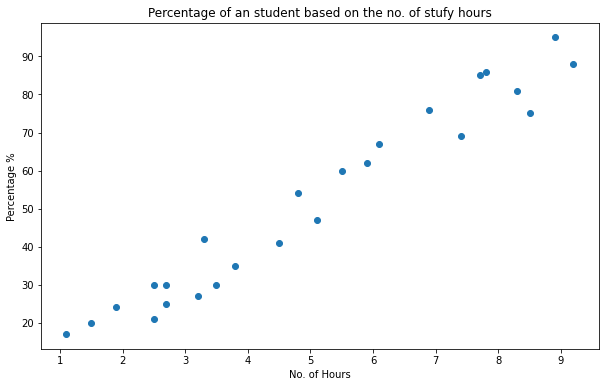

In [28]:
fig, ax = plt.subplots(figsize = (10, 6))

# Plot the data
scatter = ax.scatter(df["Hours"],
                     df["Scores"]);

# Customize the plot
ax.set(title = "Percentage of an student based on the no. of stufy hours",
       xlabel = "No. of Hours", 
       ylabel = "Percentage %");



From the above graph we can clearly see that when the hours of study is less then the percentage score is also less. Therefore it follows a positive linear relationship.

### Preparing the data
>Here the data is to be divided into attributes and labels. Attributes is the input varibale which in this case **Hours**. Label is the output variable in this case **Scores**.

In [29]:
X = df.iloc[:, :-1]

In [31]:
y = df.iloc[:, -1]

In [61]:
X.head()

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5


In [62]:
y.head()

0    21
1    47
2    27
3    75
4    30
Name: Scores, dtype: int64

### **Spliting into test train split**

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### **Choosing the model**

In [37]:
# We will use Linear Regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

### **Fitting the model**

In [38]:
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

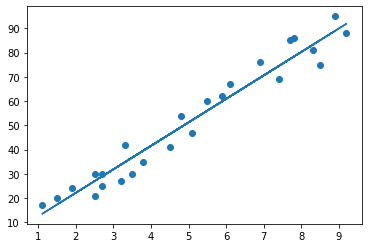

In [39]:
# Plotting the regression line
line = regressor.coef_ * X + regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line)
plt.show();

### **Use the model to make a prediction**


In [40]:
# Predicting the scores - In % using Testing data - In Hours
y_pred = regressor.predict(X_test) 

### **Evaluating the model**

#### **R^2 Score (coefficient of determination)**
>The default evaluation metric in the score() function is R^2.

In [43]:
# Calculate the models R^2 score
regressor.score(X_test, y_test)

0.9678055545167994

#### Mean absolute error (MAE)

In [44]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
mae

3.9207511902099244

**Note: Our model achieves an MAE of 3.931. This means, on average our models predictions are 3.931 % units away from the actual value.**

In [45]:
# Let's make it a little more visual.
df_av_pd = pd.DataFrame(data = {
    "Actual Values": y_test,
    "Predictions": y_pred
})
df_ac_pd

,Actual,Predicted
8,81,83.188141
16,30,27.032088
0,21,27.032088
23,76,69.633232
11,62,59.951153


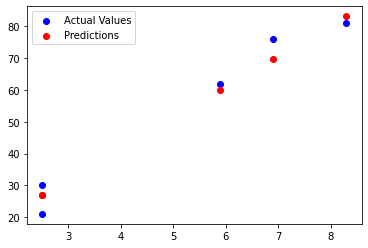

In [47]:
fig, ax = plt.subplots()
ax.scatter(X_test, df_av_pd["Actual Values"], c = "b", label = "Actual Values")
ax.scatter(X_test, df_ac_pd["Predicted"], c = "r", label = "Predictions")
ax.legend();

#### **Mean Squared Error (MSE)**


In [48]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
mse

18.943211722315272

### **Predicting the percentage of a student who studies for 9.25 hrs/day**

In [58]:
hours = np.array([9.25])
prediction = regressor.predict(hours.reshape(-1, 1))
print(f'No of Hours = {hours[0]}')
print('Predicted Score = {:.2f} %'.format(prediction[0]))

No of Hours = 9.25
Predicted Score = 92.39 %


## **Using Linear Regression Model with 0.9678055545167994 and Mean Absolute Error of 3.931. We can say that**

>***The student who study 9.25 hrs/day can score 92.39 %***